In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
X, Y = datasets.make_classification(n_samples = 600, n_classes = 2, n_clusters_per_class = 1, n_features = 2, n_informative = 1, n_redundant=0, random_state = 10)

In [3]:
print(X.shape, Y.shape)

(600, 2) (600,)


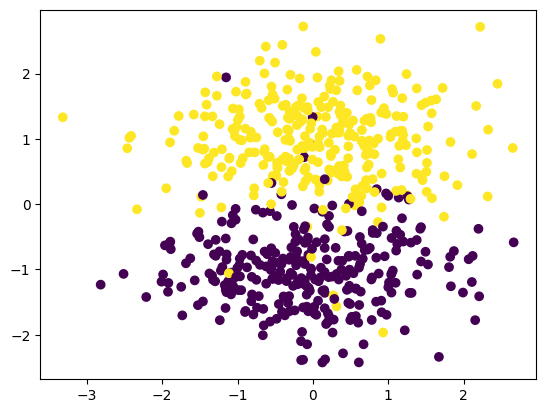

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [5]:
Y[Y == 0] = -1

In [6]:
class SVM:
    
    def __init__(self, c = 0.001):
        self.w = 0
        self.c = c
        self.b = 0
        
    def hingeloss(self, w, b, x, y):
        loss = 0
        loss += 0.5 * (np.dot(w, w.T))
        
        for i in range(x.shape[0]):
            ti = y[i] * (np.dot(w, x[i]) + b)
            loss += self.c * max(0, (1 - ti))
        
        return loss[0][0]
    
    def gradient_descent(self, x, y, learning_rate = 0.03, epochs = 500, batch = 100):
        
        w = np.zeros((1, x.shape[1]))
        b = 0
        loss = self.hingeloss(w, b, x, y)
        print(loss)
        
        epoch_loss = []
        
        for i in range(epochs):
            total_samples = np.arange(x.shape[0])
#             np.random.shuffle(total_samples)
            epoch_loss.append(self.hingeloss(w, b, x, y))
            
            for b in range(int(x.shape[0]/batch)):
                
                grad_w = 0
                grad_b = 0
                
                for j in range(b*batch, (b*batch) + batch):
#                     print(j)
                    if j < x.shape[0]:
                        ids = total_samples[j]
                        ti = y[j] * (np.dot(w, x[j]) + b)

                        if ti >= 1:
                            grad_b += 0
                            grad_w += 0
                        else:
                            grad_w += self.c * y[j] * x[j]
                            grad_b += self.c * y[j]
                
                w = w - learning_rate * w + learning_rate*grad_w
                b = b + learning_rate*grad_b
                
        self.w = w
        self.b = b
        return w, b, epoch_loss

In [7]:
svm = SVM()
w, b, epoch_loss = svm.gradient_descent(X, Y)

0.6000000000000004


In [8]:
epoch_loss

[0.6000000000000004,
 1.7965780039039758,
 1.7942160056731113,
 1.7923010180337362,
 1.7907423072550277,
 1.7894692147696991,
 1.7884262977364473,
 1.787569742436838,
 1.786864696716282,
 1.7862832699983529,
 1.7858030213970297,
 1.7854058072390193,
 1.785076895241689,
 1.7848042781031614,
 1.7845781374437857,
 1.7843904220557316,
 1.7842345137841438,
 1.7841049611408448,
 1.7839972656863141,
 1.7839077098329528,
 1.7838332173934064,
 1.783771240185069,
 1.7837196654925092,
 1.7836767403167963,
 1.7836410092005373,
 1.7836112630784238,
 1.7835864971156015,
 1.783565875896609,
 1.7835487046426934,
 1.7835344053850841,
 1.7835224972210206,
 1.7835125799390517,
 1.7835043204289227,
 1.7834974413958347,
 1.7834917119836047,
 1.7834869399805575,
 1.7834829653387836,
 1.7834796547838117,
 1.7834768973301502,
 1.7834746005497129,
 1.7834726874661737,
 1.783471093969894,
 1.7834697666659267,
 1.7834686610823516,
 1.7834677401784702,
 1.7834669731026158,
 1.783466334157743,
 1.7834658019399912,

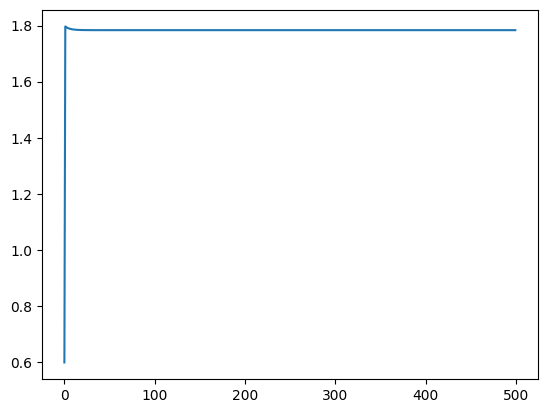

In [9]:
plt.plot(epoch_loss)